## Importing necessary libraries

In [1]:
# for analysis
import pandas as pd
import numpy as np

# for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# extra
import warnings
warnings.filterwarnings(action="ignore")

## Data Loading

In [2]:
df=pd.read_csv("Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df["Converted"].unique() # Binary Classification Model

array([0, 1], dtype=int64)

## Data Cleaning

### Treatment for Select values

In [6]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Missing Values

In [8]:
# checking missing values
round(100*df.isnull().mean(),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [9]:
# dropping the columns with more than 40% null values
for i in df.columns:
    if 100*df[i].isnull().mean()>40:
        df.drop(i,1,inplace=True)

In [10]:
# the variable City, Country, Tags, What matters most to you in choosing a course won't be of any use in analysis therefore we drop it 
df.drop(['City'], axis = 1, inplace = True)
df.drop(['Country'], axis = 1, inplace = True)
df.drop(['Tags'], axis = 1, inplace = True)
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [11]:
# again checking null values after dropping
round(100*df.isnull().mean(),2).sort_values(ascending=False)

Specialization                              36.58
What is your current occupation             29.11
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Prospect ID                                  0.00
X Education Forums                           0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
Search                                       0.00
Newspaper Article                            0.00
Magazine                                     0.00
Lead Number                                  0.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

##  Handling columns with only one unique value

In [13]:
df.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                18
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

### Following columns have only one unique value:

- 'I agree to pay the amount through cheque',<br>
- 'Get updates on DM Content',<br>
- 'Update me on Supply Chain Content',<br>
-  'Receive More Updates About Our Courses',<br>
-  'Magazine'

##### These columns are of no use as they have only one category of response from customer and can be dropped:

In [14]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df.shape)
df.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


In [15]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df=df.fillna(value=missing_values)

In [16]:
# Re Checking the percentage of null values for remaining columns
round(100*df.isnull().mean(),2).sort_values(ascending=False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Prospect ID                               0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
X Education Forums                        0.00
Newspaper Article                         0.00
Search                                    0.00
Last Activity                             0.00
Specialization                            0.00
Lead Number                               0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Call                               0.00
Do Not Email                              0.00
Lead Source                               0.00
Lead Origin                               0.00
Last Notable Activity                     0.00
dtype: float6

In [17]:
# TotalVisits missing values to be imputed with mode
df['TotalVisits'].fillna(df['TotalVisits'].mode()[0], inplace=True)

In [18]:
# Page Views Per Visit missing values to be imputed with mode
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0], inplace=True)

In [19]:
# Re Checking the percentage of null values for remaining columns
round(100*df.isnull().mean(),2).sort_values(ascending=False)

Prospect ID                               0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Last Activity                             0.0
Lead Number                               0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
Last Notable Activity                     0.0
dtype: float64

In [20]:
# 'Prospect ID','Lead Number','Last Notable Activity'do not add any value to the model.Dropping these columns will remove unnecessary data from the dataframe.
print("Before Dropping Columns",df.shape)
df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

## Segmentation

In [22]:
cat=['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview']
cont=['Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']
len(cat+cont)

18

## Checking & Dropping Category Columns that are Skewed

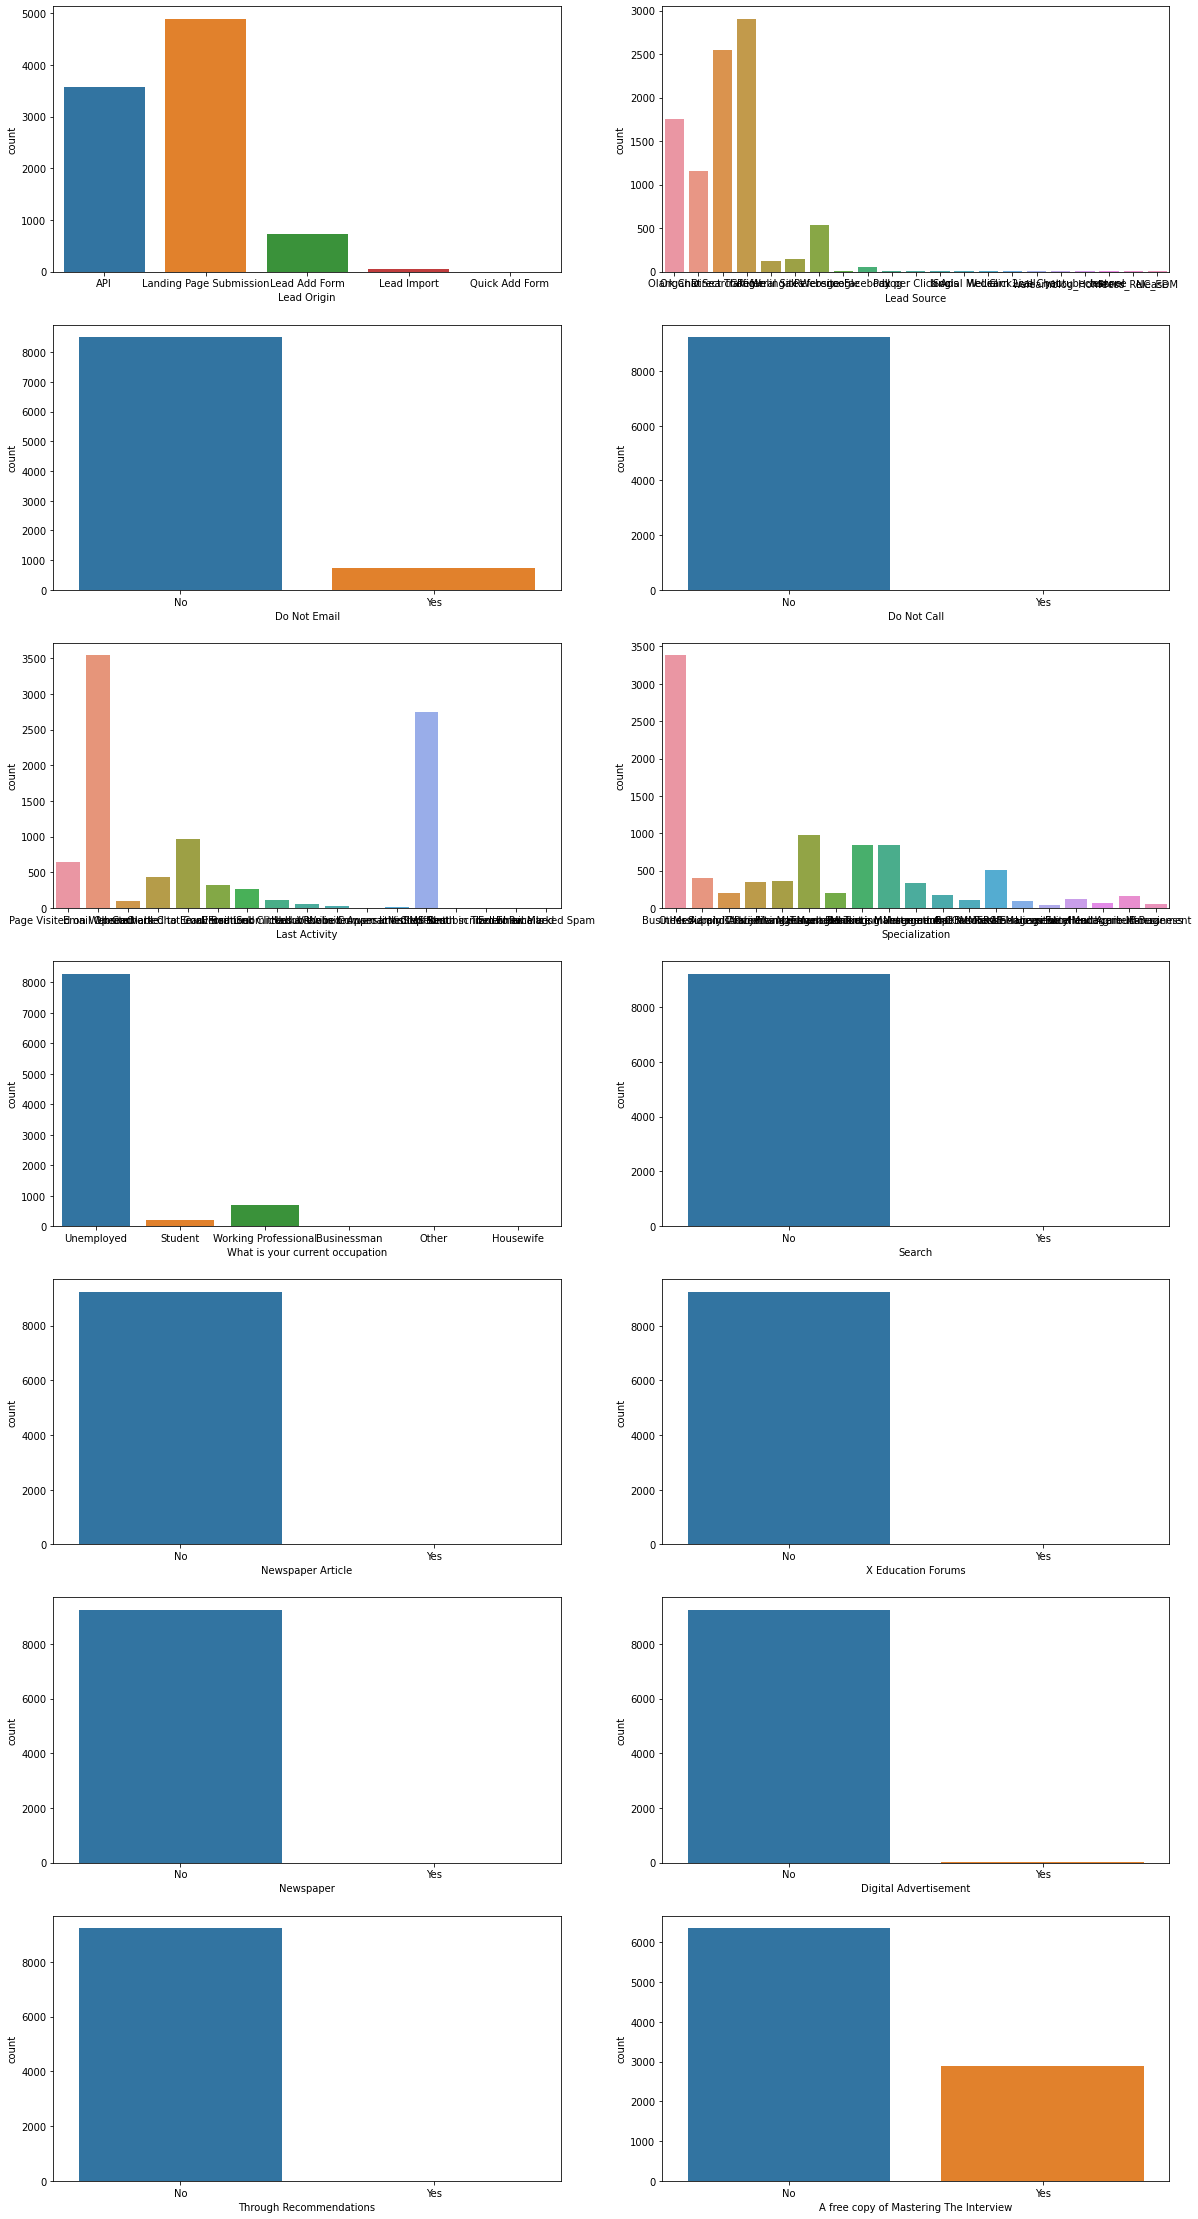

In [23]:
# Checking skewness in categorical columns
plt.figure(figsize = (20,40))
i = 1
for col in cat:
    plt.subplot(7,2,i)
    sns.countplot(x = col , data = df)
    i += 1
plt.show()

### Following columns have data which is highly skewed :
'Do Not Call',<br>
'Search',<br>
'Newspaper Article',<br>
'X Education Forums',<br>
'Newspaper',<br>
'Digital Advertisement',<br>
'Through Recommendations'.
#### Hence these columns will be dropped as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can lead to biased or inaccurate parameter estimates.

In [24]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df.shape)
df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


## Outliers

TotalVisits


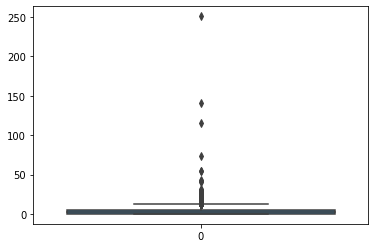

Total Time Spent on Website


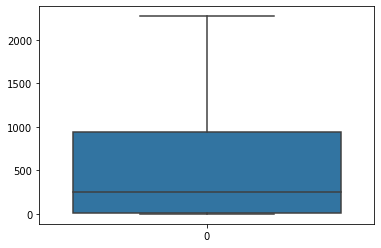

Page Views Per Visit


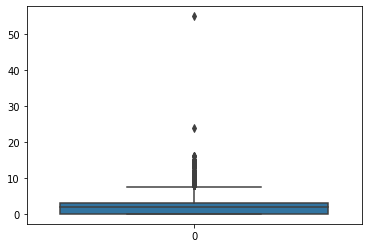

In [25]:
# Checking outliers for numerical variables other than target variable 
cont.remove("Converted")
for i in cont:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [26]:
# treating outliers via capping and flooring
for i in cont:
    q1 = df[i].describe()["25%"]
    q3 = df[i].describe()["75%"]
    IQR = q3 - q1
    upper_bound = q3 + 1.5*IQR
    lower_bound = q1 - 1.5*IQR
# capping upper_bound
    df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])
# flooring lower_bound
    df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])     

TotalVisits


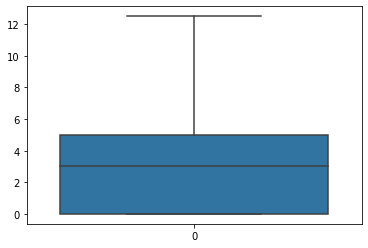

Total Time Spent on Website


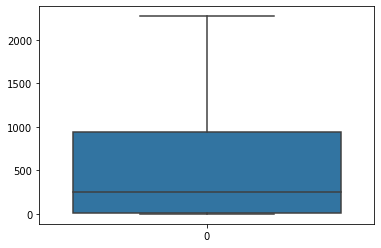

Page Views Per Visit


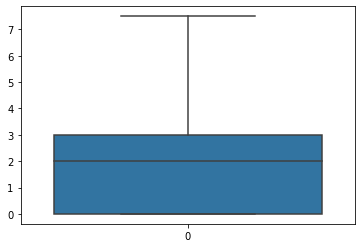

In [27]:
# Checking Boxplot after Outlier Treatment
for i in cont:
    print(i)
    sns.boxplot(df[i])
    plt.show()

## Fixing Invalid values & Standardising Data in columns

In [28]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_^_"*40,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.0108

In [29]:
# Grouping low frequency value levels to Others
df['Lead Source'] = df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df['Lead Source'] = df['Lead Source'].replace("google","Google")

In [30]:
# value_counts percentage after replace
df["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [31]:
# Grouping low frequency value levels to Others 
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [32]:
# value_counts percentage after replace
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

## Mapping Binary categorical variables

In [33]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df['Do Not Email'] = df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   float64
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

## Data Imbalance

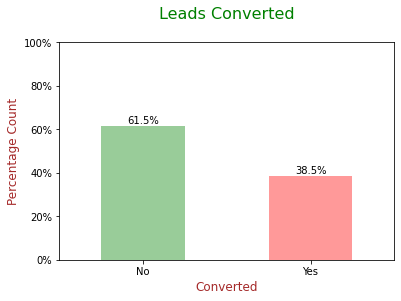

In [35]:
## ploting the results on bar plot

ax=(100*df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

## Exploratory Data Analysis

In [36]:
cat_cols = ["Lead Origin","What is your current occupation","Do Not Email",
            "A free copy of Mastering The Interview","Lead Source","Last Activity","Specialization"]
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
len(cat_cols)+len(num_cols)

11

# Univariate Analysis

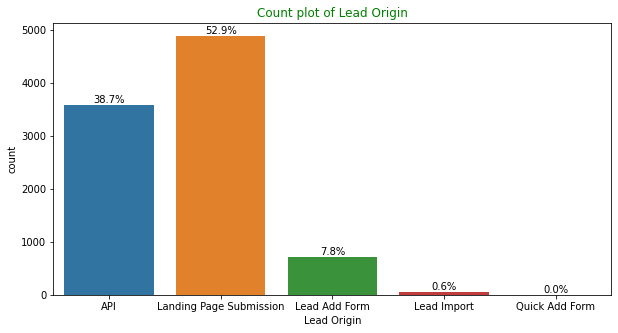

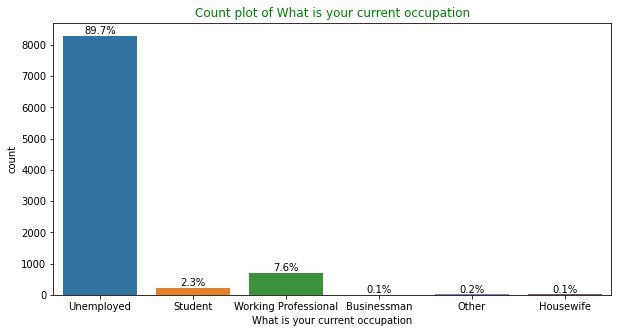

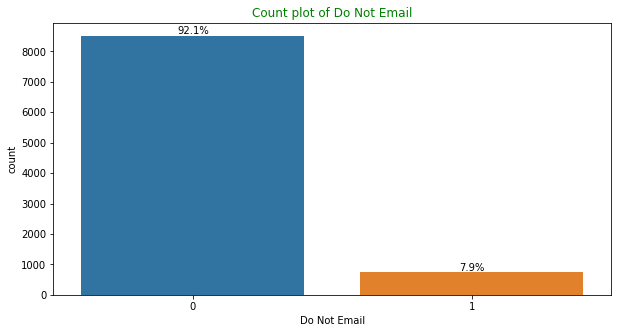

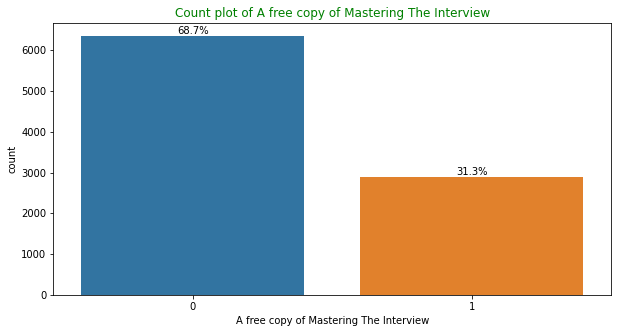

In [37]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

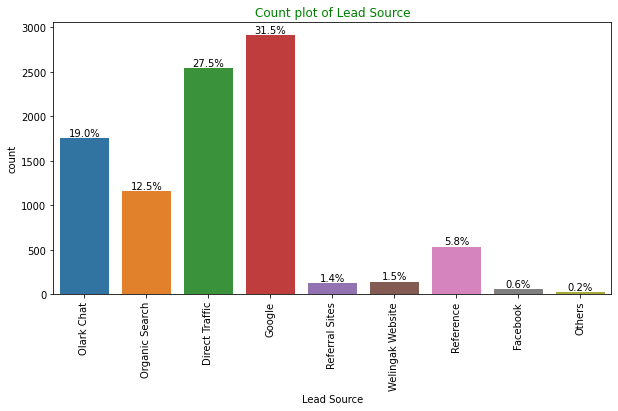

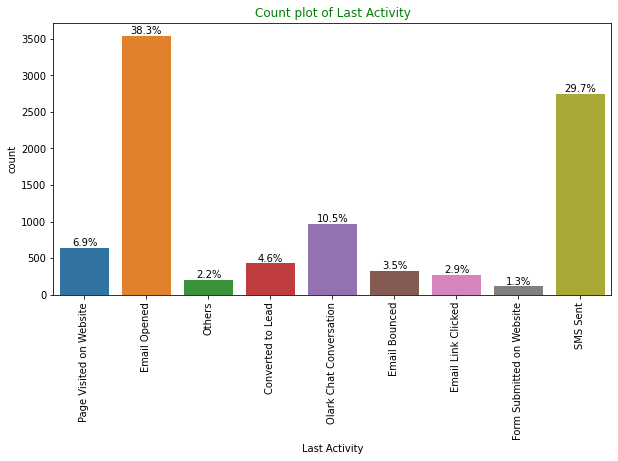

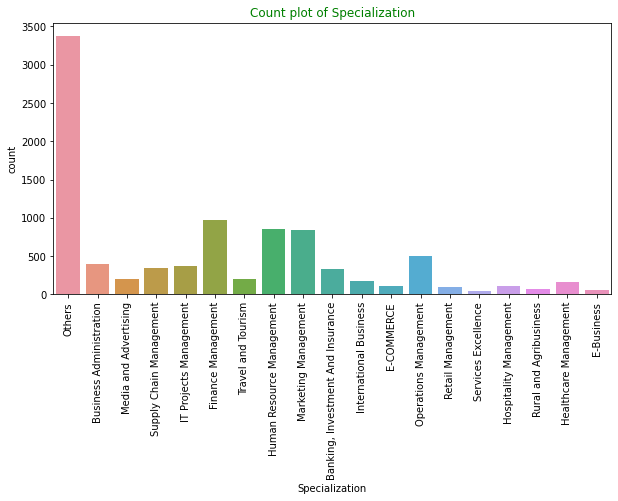

In [38]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

#### Here is the list of features from variables which are present in majority (Converted and Not Converted included)

Lead Origin: "Landing Page Submission" identified 53% customers, "API" identified 39%.<br>

Current_occupation: It has 90% of the customers as Unemployed<br>

Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.<br>

Lead Source: 58% Lead source is from Google & Direct Traffic combined<br>

Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities

## Bivariate Analysis

In [39]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="prism_r",alpha=0.46)
    
    total=len(df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
# Annotation for 2nd plot
# Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

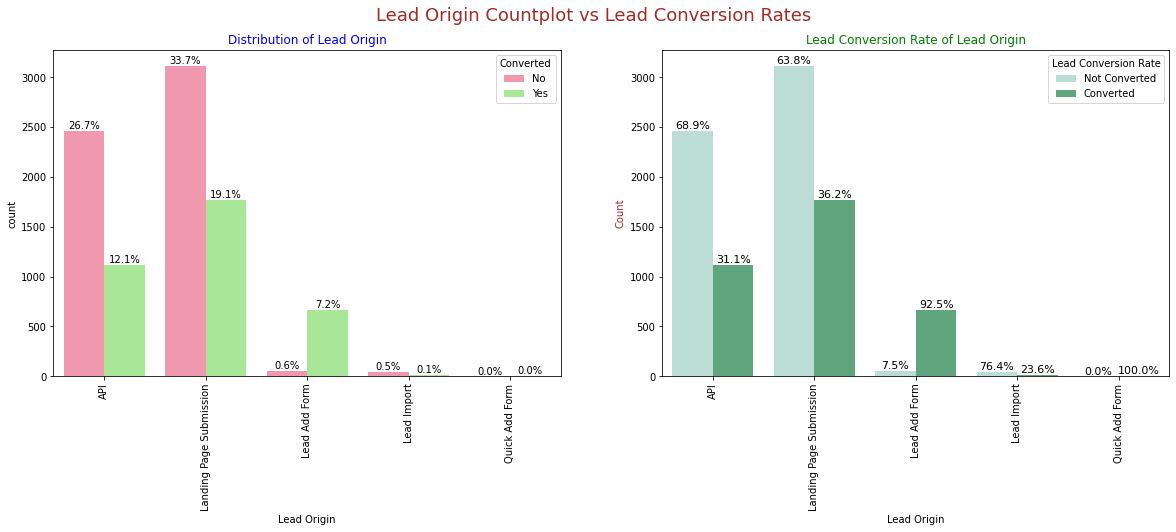

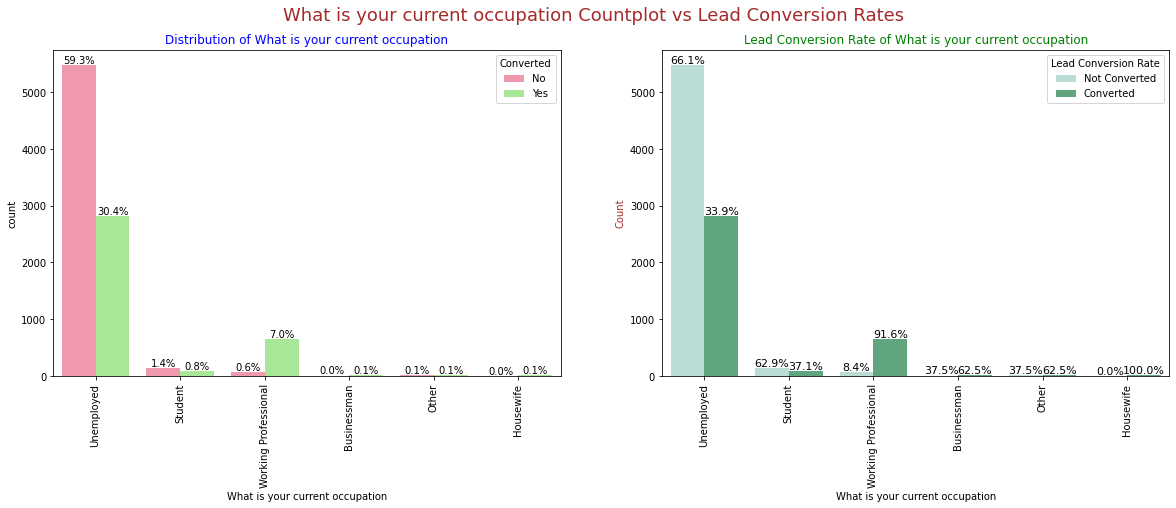

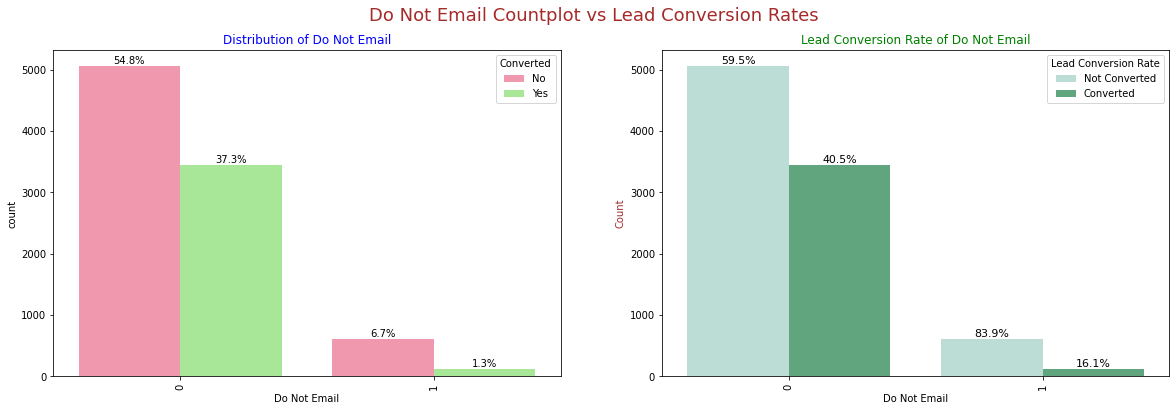

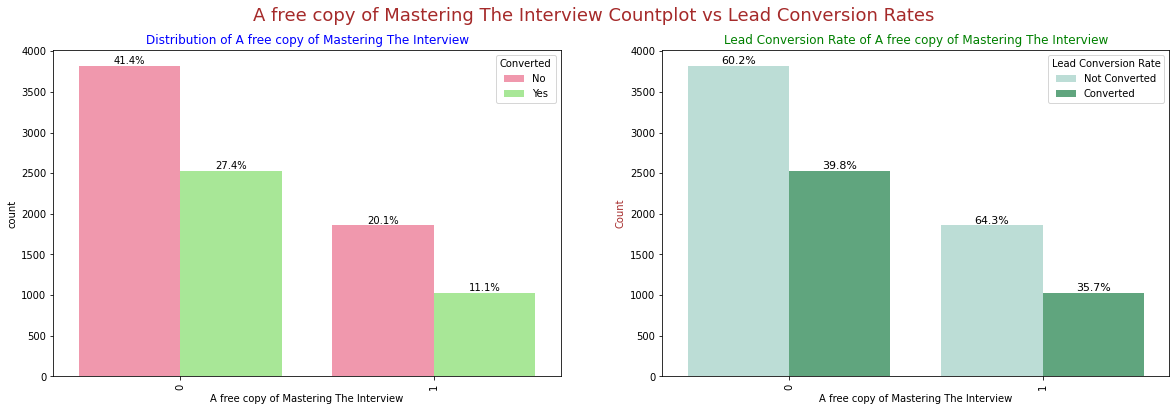

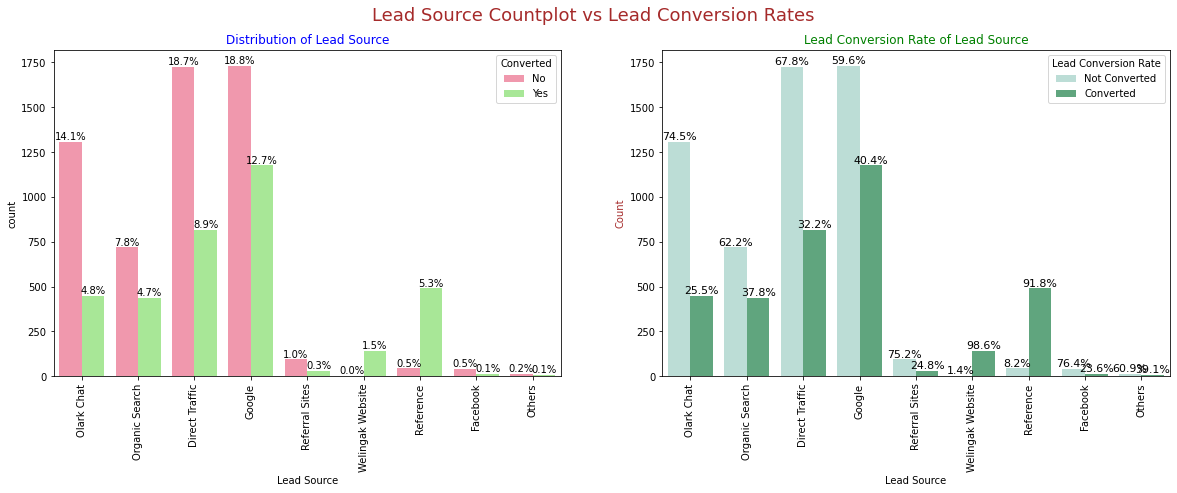

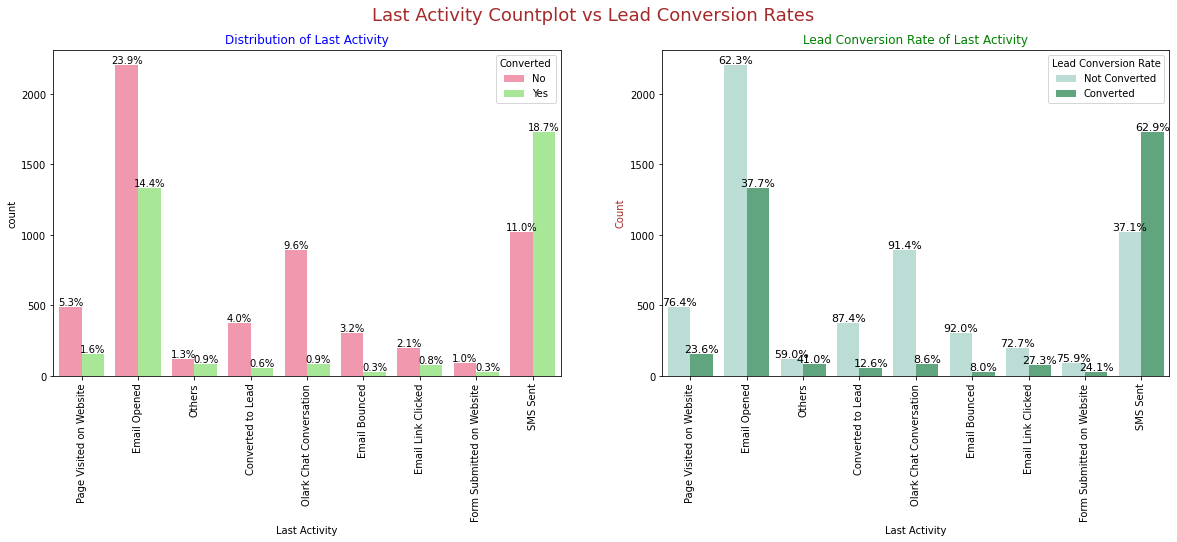

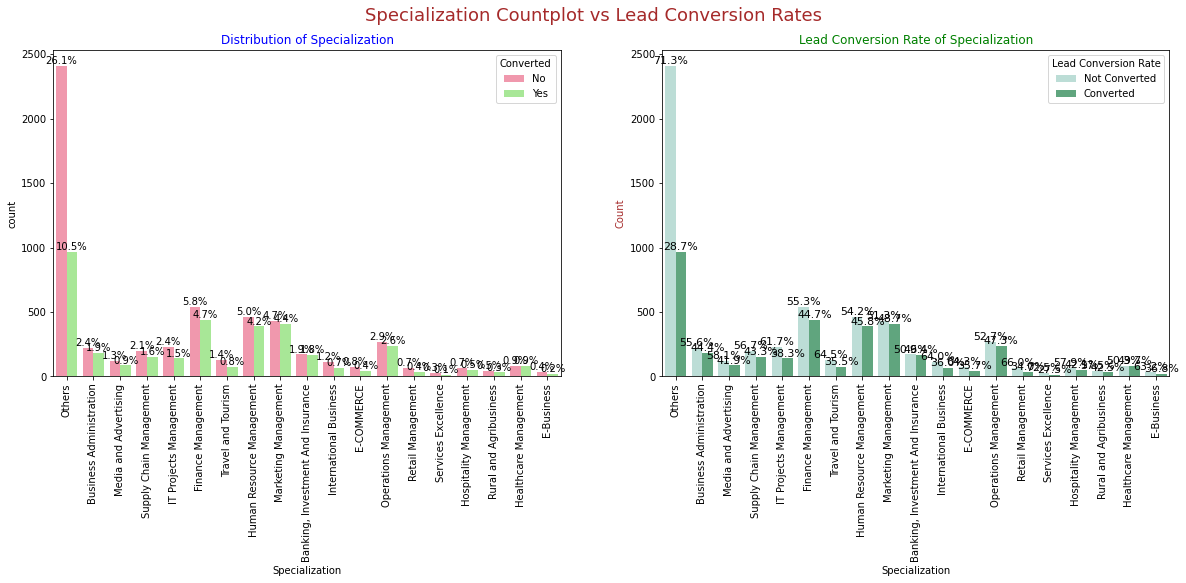

In [40]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable

for i in cat_cols:
    Bivariate_cat(df,variable_name=i)

<Figure size 1440x720 with 0 Axes>

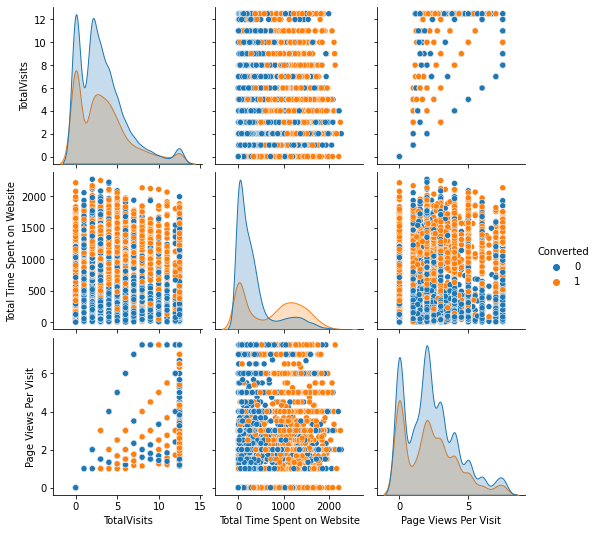

In [41]:
plt.figure(figsize=(20, 10))
sns.pairplot(data=df,vars=cont,hue="Converted")                                  
plt.show()

## Multivariate Analysis

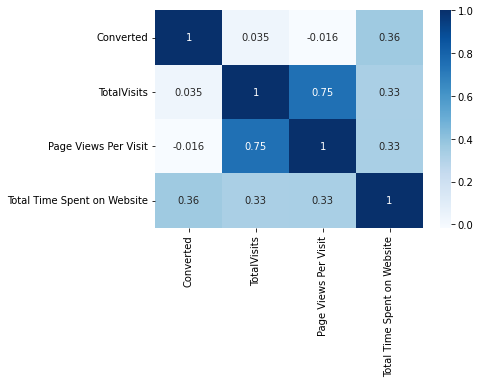

In [42]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

## Dummy Variable

In [43]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"]], drop_first=True)

# Adding the results to the master dataframe
df= pd.concat([df, dummy], axis=1)

In [44]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [45]:
# We have created dummies for the below variables, so we can drop them

df = df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"],1)

In [46]:
df.shape

(9240, 49)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   float64
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

## Train Test Split

In [48]:
# Putting predictor variables to X
X = df.drop('Converted', axis=1)

# Putting Target variables to y
y = df["Converted"]

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [51]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


## Feature Scaling (Standardization)

In [52]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [53]:
# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df['Converted'])/len(df['Converted'].index))*100
LCR

38.53896103896104

#### We have 38.5% Conversion Rate

### Feature elimination based on correlations

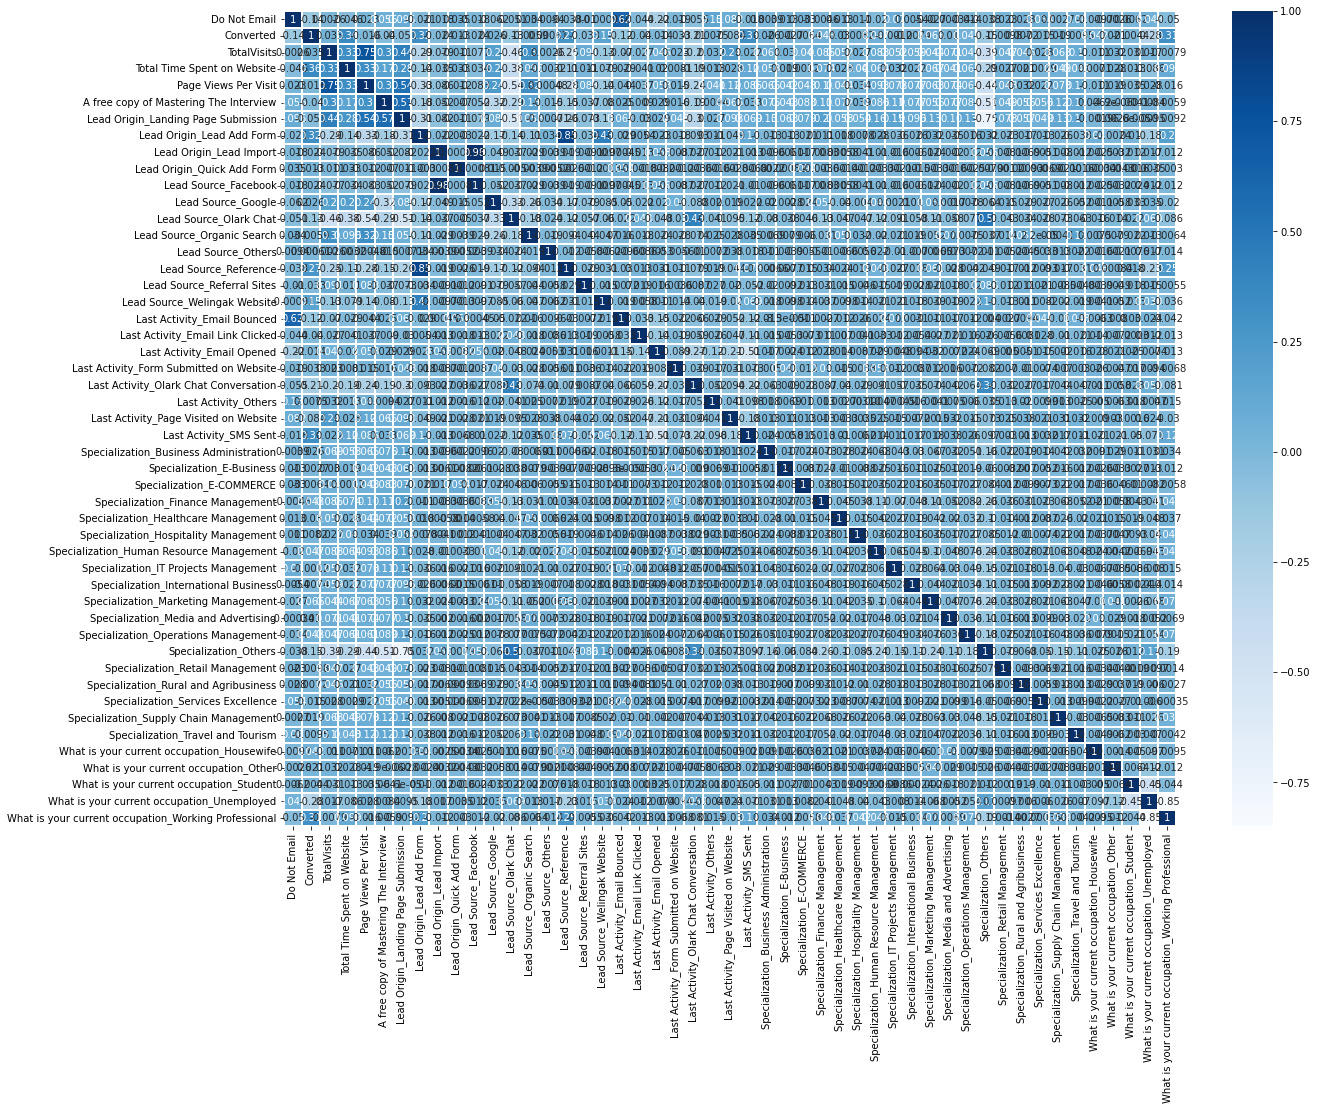

In [55]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

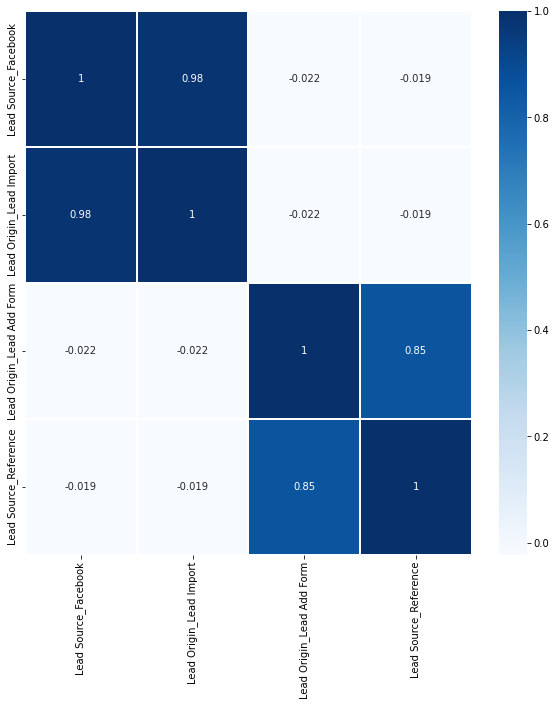

In [56]:
# as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (10,10))        
sns.heatmap(df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

 These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.

In [57]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## Model Building

### Feature Selection Using RFE (Recursive Feature Elimination)

In [58]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [59]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Busi

In [60]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
22,Last Activity_SMS Sent,True,1
41,What is your current occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


In [61]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [62]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [63]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                                   -1.033284
Total Time Spent on Website                              1.050544
Lead Origin_Landing Page Submission                     -1.272090
Lead Source_Facebook                                    -0.696059
Lead Source_Olark Chat                                   0.900083
Lead Source_Others                                       0.980708
Lead Source_Reference                                    2.897685
Lead Source_Welingak Website                             5.380227
Last Activity_Email Opened                               0.950623
Last Activity_Olark Chat Conversation                   -0.553411
Last Activity_Others                                     1.258012
Last Activity_SMS Sent                                   2.068763
Specialization_Hospitality Management                   -1.072037
Specialization_Others                                   -1.193681
What is your current occupation_Housewife               23.022209
What is yo

In [64]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Sat, 03 Jun 2023   Deviance:                       5465.5
Time:                        18:31:41   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

"What is your current occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

In [65]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("What is your current occupation_Housewife")

### Model 2

In [66]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                                  -1.025075
Total Time Spent on Website                             1.049364
Lead Origin_Landing Page Submission                    -1.267369
Lead Source_Facebook                                   -0.696913
Lead Source_Olark Chat                                  0.899051
Lead Source_Others                                      0.973897
Lead Source_Reference                                   2.917123
Lead Source_Welingak Website                            5.379144
Last Activity_Email Opened                              0.949036
Last Activity_Olark Chat Conversation                  -0.558345
Last Activity_Others                                    1.248172
Last Activity_SMS Sent                                  2.058828
Specialization_Hospitality Management                  -1.079528
Specialization_Others                                  -1.197801
What is your current occupation_Working Professional    2.677350
dtype: float64

In [67]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Sat, 03 Jun 2023   Deviance:                       5480.7
Time:                        18:31:41   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

"Lead Source_Facebook" column will be removed from model due to high p-value of 0.187, which is above the accepted threshold of 0.05 for statistical significance.

In [68]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Facebook")

### Model 3

In [69]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                                  -1.040542
Total Time Spent on Website                             1.051824
Lead Origin_Landing Page Submission                    -1.249311
Lead Source_Olark Chat                                  0.916940
Lead Source_Others                                      0.981395
Lead Source_Reference                                   2.937179
Lead Source_Welingak Website                            5.396676
Last Activity_Email Opened                              0.943420
Last Activity_Olark Chat Conversation                  -0.558250
Last Activity_Others                                    1.248700
Last Activity_SMS Sent                                  2.055550
Specialization_Hospitality Management                  -1.090368
Specialization_Others                                  -1.194330
What is your current occupation_Working Professional    2.675678
dtype: float64

In [70]:
#Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Sat, 03 Jun 2023   Deviance:                       5482.6
Time:                        18:31:41   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

"Lead Source_Others" column will be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 for statistical significance.

In [71]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Others")

### Model 4

In [72]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                                  -1.023594
Total Time Spent on Website                             1.049789
Lead Origin_Landing Page Submission                    -1.258954
Lead Source_Olark Chat                                  0.907184
Lead Source_Reference                                   2.925326
Lead Source_Welingak Website                            5.388662
Last Activity_Email Opened                              0.942099
Last Activity_Olark Chat Conversation                  -0.555605
Last Activity_Others                                    1.253061
Last Activity_SMS Sent                                  2.051879
Specialization_Hospitality Management                  -1.094445
Specialization_Others                                  -1.203333
What is your current occupation_Working Professional    2.669665
dtype: float64

In [73]:
#Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Sat, 03 Jun 2023   Deviance:                       5486.1
Time:                        18:31:41   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

 Model 4 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.<br>

Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [74]:
# Now checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,What is your current occupation_Working Profes...,1.21
9,Lead Source_Welingak Website,1.08


No variable needs to be dropped as they all have good VIF values less than 5.<br>

p-values for all variables is less than 0.05<br>
This model looks acceptable as everything is under control (p-values & VIFs).<br>
So we will final our Model 4 for Model Evaluation.

## Model Evaluation
Confusion Matrix<br>
Accuracy<br>
Sensitivity and Specificity<br>
Threshold determination using ROC & Finding Optimal cutoff point<br>
Precision and Recall

In [75]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [76]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [77]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.474082,1871
1,0,0.073252,6795
2,0,0.249087,3516
3,0,0.768973,8105
4,0,0.212973,3934


Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [78]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.474082,1871,0
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


## Confusion Matrix

In [79]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3588  414]
 [ 846 1620]]


In [80]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3588       |   414
# converted           846        |   1620  


# Above is the confusion matrix when we use threshold of probability as 0.5


## Accuracy

In [81]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8051948051948052


## Sensitivity and Specificity

In [82]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [83]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.656934306569343


In [84]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.896551724137931


In [85]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10344827586206896


In [86]:
# positive predictive value 
print (TP / float(TP+FP))

0.7964601769911505


In [87]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8092016238159675


## Plotting the ROC Curve

In [88]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

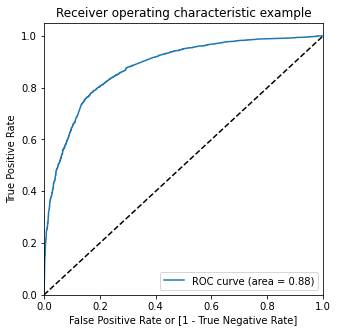

In [89]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

 Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

## Finding Optimal Cutoff Point/ Probability

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


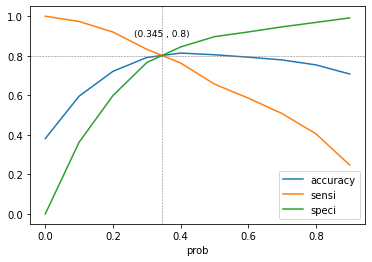

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)
# Displaying the plot
plt.show()

 0.345 is the approx. point where all the curves meet, so 0.345 seems to be our Optimal cutoff point for probability threshold .

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.474082,1871,1
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


## Calculating all metrics using confusion matrix for Train

In [94]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8045763760049475


In [95]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    

In [96]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3230  772]
 [ 492 1974]] 

************************************************** 

True Negative                    :  3230
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  772
Model Accuracy                   :  0.8046
Model Sensitivity                :  0.8005
Model Specificity                :  0.8071
Model Precision                  :  0.7189
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.1929


************************************************** 



## Precision and recall tradeoff
Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [97]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

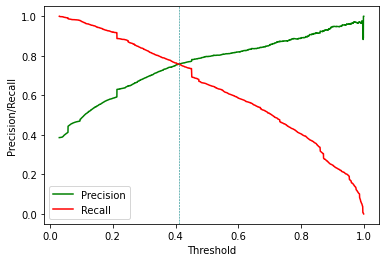

In [98]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

 The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [99]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [100]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.474082,1871,1,1
1,0,0.073252,6795,0,0
2,0,0.249087,3516,0,0
3,0,0.768973,8105,1,1
4,0,0.212973,3934,0,0


In [101]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3406  596]
 [ 596 1870]] 

************************************************** 

True Negative                    :  3406
True Positive                    :  1870
False Negative                   :  596
False Positve                    :  596
Model Accuracy                   :  0.8157
Model Sensitivity                :  0.7583
Model Specificity                :  0.8511
Model Precision                  :  0.7583
Model Recall                     :  0.7583
Model True Positive Rate (TPR)   :  0.7583
Model False Positive Rate (FPR)  :  0.1489


************************************************** 



--As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.<br>
--80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

## Adding Lead Score Feature to Training dataframe
--A higher score would mean that the lead is hot, i.e. is most likely to convert<br>
--Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [102]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.474082,1871,1,47
1,0,0.073252,6795,0,7
2,0,0.249087,3516,0,25
3,0,0.768973,8105,1,77
4,0,0.212973,3934,0,21


## Making Predictions on test set

In [103]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2772 non-null   int64  
 1   TotalVisits                                           2772 non-null   float64
 2   Total Time Spent on Website                           2772 non-null   float64
 3   Page Views Per Visit                                  2772 non-null   float64
 4   A free copy of Mastering The Interview                2772 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                            2772 non-null   uint8  
 7   Lead Source_Facebook                                  2772 non-null   uint8  
 8   Lead Source_Google                                    2

### Scaling Test dataset

In [104]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


## Prediction on Test Dataset using final model

In [105]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [106]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

In [107]:
# top 10 columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [108]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.697934
2376,0.860665
7766,0.889241
9199,0.057065
4359,0.871510


In [109]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [110]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.697934
1,1,2376,0.860665
2,1,7766,0.889241
3,0,9199,0.057065
4,1,4359,0.871510


In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.697934
1,2376,1,0.860665
2,7766,1,0.889241
3,9199,0,0.057065
4,4359,1,0.871510


In [112]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.697934,1
1,2376,1,0.860665,1
2,7766,1,0.889241,1
3,9199,0,0.057065,0
4,4359,1,0.871510,1


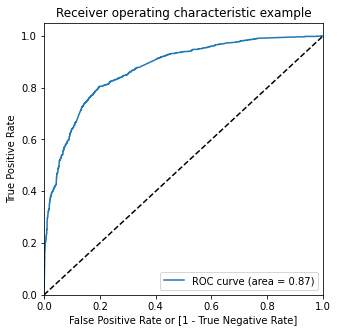

In [113]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

--Area under ROC curve is 0.87 out of 1 which indicates a good predictive model<br>
--Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set.<br>
--We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

## Test set Model Evaluation

In [114]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1353  324]
 [ 221  874]] 

************************************************** 

True Negative                    :  1353
True Positive                    :  874
False Negative                   :  221
False Positve                    :  324
Model Accuracy                   :  0.8034
Model Sensitivity                :  0.7982
Model Specificity                :  0.8068
Model Precision                  :  0.7295
Model Recall                     :  0.7982
Model True Positive Rate (TPR)   :  0.7982
Model False Positive Rate (FPR)  :  0.1932


************************************************** 



The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.<br>

For Test set<br>
<li>Accuracy : 80.34%<br>
<li>Sensitivity : 79.82% ≈ 80%<br>
<li>Specificity : 80.68%<br></li>
These matrics are very close to train set, so out final model logm4 is performing with good consistency on both Train & Test set

In [116]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website                            5.388662
Lead Source_Reference                                   2.925326
What is your current occupation_Working Professional    2.669665
Last Activity_SMS Sent                                  2.051879
Last Activity_Others                                    1.253061
Total Time Spent on Website                             1.049789
Last Activity_Email Opened                              0.942099
Lead Source_Olark Chat                                  0.907184
Last Activity_Olark Chat Conversation                  -0.555605
const                                                  -1.023594
Specialization_Hospitality Management                  -1.094445
Specialization_Others                                  -1.203333
Lead Origin_Landing Page Submission                    -1.258954
dtype: float64

A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

## Adding Lead Score Feature to Test dataframe<br>
<li>A higher score would mean that the lead is hot, i.e. is most likely to convert</li>
<li>Whereas a lower score would mean that the lead is cold and will mostly not get converted.</li>

In [117]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.697934,1,70
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
3,9199,0,0.057065,0,6
4,4359,1,0.871510,1,87


Lead Score is assigned to the customers<br>

<li>The customers with a higher lead score have a higher conversion chance</li>
<li>The customers with a lower lead score have a lower conversion chance.</li>

## Conclusion

<b>Train Data Set:</b><br>
<li>Accuracy: 80.46%</li>

<li>Sensitivity: 80.05%</li>

<li>Specificity: 80.71%</li>

<b>Test Data Set:</b><br>
<li>Accuracy: 80.34%</li>

<li>Sensitivity: 79.82% ≈ 80%</li>

<li>Specificity: 80.68%</li>

<p>The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.</p>

<li>The model achieved a sensitivity of 80.05% in the train set and 79.82% in the test set, using a cut-off value of 0.345.</li>
<li>Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting</li>
<li>The CEO of X Education had set a target sensitivity of around 80%.</li>
<li>The model also achieved an accuracy of 80.46%, which is in line with the study's objectives.</li>


## Model parameters

<li>The final Logistic Regression Model has 12 features</li><br>
Top 3 features that contributing positively to predicting hot leads in the model are:<br>
<li>Lead Source_Welingak Website</li>

<li>Lead Source_Reference</li>

<li>Current_occupation_Working Professional</li>

The Optimal cutoff probability point is 0.345.Converted probability greater than 0.345 will be predicted as Converted lead (Hot lead) & probability smaller than 0.345 will be predicted as not Converted lead (Cold lead).



## Recommendations

<b>To increase our Lead Conversion Rates:</b> <br>
<li>Focus on features with positive coefficients for targeted marketing strategies.</li>
<li>Develop strategies to attract high-quality leads from top-performing lead sources.</li>
<li>Engage working professionals with tailored messaging.</li>
<li>Optimize communication channels based on lead engagement impact.</li>
<li>More budget/spend can be done on Welingak Website in terms of advertising, etc.</li>
<li>Incentives/discounts for providing reference that convert to lead, encourage providing more references.</li>
<li>Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too.</li>

<b>To identify areas of improvement:<b><br>
<li>Analyze negative coefficients in specialization offerings.</li>
<li>Review landing page submission process for areas of improvement.</li>